# ****Welcome to the Diamond Price Prediction: The 4C Model Project****

## Business statement

#### The Diamond Price Prediction project aims to provide a data-driven solution for jewelry businesses, buyers, and sellers to accurately estimate diamond prices based on key attributes such as carat, cut, color, clarity, depth, and dimensions. By utilizing machine learning techniques, this solution will enable stakeholders to make informed pricing decisions, optimize inventory management, and enhance customer satisfaction with accurate and transparent diamond valuations. The model will be accessible through a user-friendly Streamlit web application, ensuring ease of use for both industry professionals and consumers.

In [131]:
# import liberies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.simplefilter(action= 'ignore')

### Dataset dictionary 

Carat: The weight of the diamond; higher carat means a larger and more expensive diamond.

Cut: Determines brilliance; rated as Ideal, Premium, Very Good, Good, and Fair.

Color: Ranges from D (colorless, most valuable) to J (yellowish, less valuable).

Clarity: Measures internal flaws; grades range from FL (flawless) to I1 (included, least valuable).

Depth: The diamond’s height-to-width ratio; affects light reflection and brilliance.

Table: The largest top facet; an ideal size enhances sparkle, too large or small reduces brilliance.

X (Width), Y (Length), Z (Height): Define the diamond’s proportions and appearance.

Price: The cost in USD, influenced by carat, cut, color, clarity, and proportions.








In [55]:

df = pd.read_csv("/Users/sot/SDS-CP023-diamond-price-predictor/type of the Diamond new.csv")

In [56]:
df.head(10)

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58
5,Fair,H,SI2,0.91,64.4,57.0,2763,6.11,3.93,6.09
6,Fair,H,SI2,0.91,65.7,60.0,2763,6.03,3.95,5.99
7,Fair,H,SI2,0.98,67.9,60.0,2777,6.05,4.08,5.97
8,Fair,G,SI1,0.84,55.1,67.0,2782,6.39,3.47,6.20
9,Fair,E,I1,1.01,64.5,58.0,2788,6.29,4.03,6.21


In [57]:
# column names normalization

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [58]:
# Reorder the columns so 'price' is first

df = df[['price', 'cut', 'color', 'clarity', 'carat', 'depth', 'table', 'x_(premium)', 'z_(very_good)', 'y_(good)']]


In [59]:
df

,price,cut,color,clarity,carat,depth,table,x_(premium),z_(very_good),y_(good)
0,337,Fair,E,VS2,0.22,65.1,61.0,3.87,2.49,3.78
1,2757,Fair,E,SI2,0.86,55.1,69.0,6.45,3.52,6.33
2,2759,Fair,F,SI2,0.96,66.3,62.0,6.27,4.07,5.95
3,2762,Fair,F,VS2,0.70,64.5,57.0,5.57,3.58,5.53
4,2762,Fair,F,VS2,0.70,65.3,55.0,5.63,3.66,5.58
...,...,...,...,...,...,...,...,...,...,...
53935,2755,Very Good,E,VS2,0.70,62.8,60.0,5.59,3.53,5.65
53936,2755,Very Good,D,VS1,0.70,63.1,59.0,5.67,3.55,5.58
53937,2757,Very Good,E,VS2,0.70,60.5,59.0,5.71,3.47,5.76
53938,2757,Very Good,E,VS2,0.70,61.2,59.0,5.69,3.49,5.72


# EDA ON CATEGROICAL FEATURES

In [60]:
df['cut'].value_counts()


cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

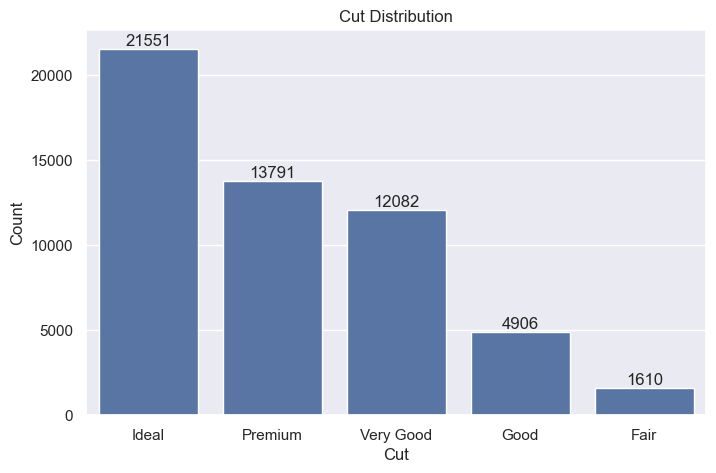

In [61]:


cut_counts = df['cut'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
cut = sns.countplot(data=df, x='cut', order=cut_counts.index)

for p in cut.patches:
    cut.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2, p.get_height()),  
        ha='center',  
        va='bottom'  
    )

plt.title("Cut Distribution")
plt.xlabel("Cut")
plt.ylabel("Count")
plt.show()


In [62]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

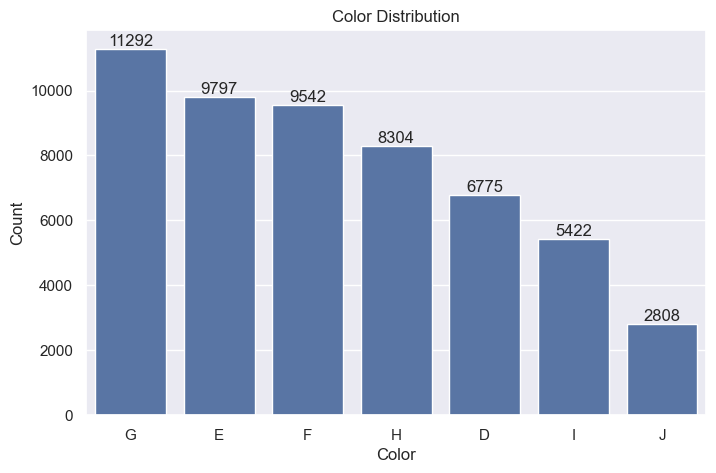

In [63]:
color_counts = df['color'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
color = sns.countplot(data=df, x='color', order=color_counts.index)

for p in color.patches:
    color.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2, p.get_height()),  
        ha='center',  
        va='bottom'  
    )

plt.title("Color Distribution")
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

In [64]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

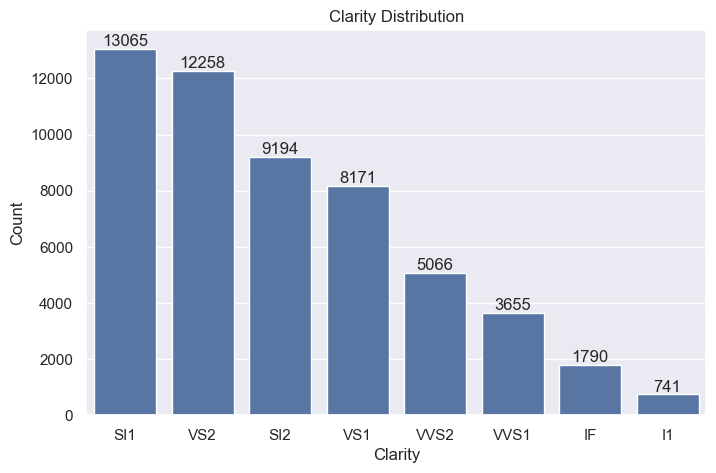

In [65]:
clarity_counts = df['clarity'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
clarity = sns.countplot(data=df, x='clarity', order=clarity_counts.index)

for p in clarity.patches:
    clarity.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2, p.get_height()),  
        ha='center',  
        va='bottom'  
    )

plt.title("Clarity Distribution")
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.show()

In [66]:
df['clarity'] = df['clarity'].replace({'IF': 'Others', 'I1': 'Others'})

### In the EDA of the clarity feature, I discovered that IF was present in the dataset but was not mentioned in the dataset dictionary. In this case , I grouped IF and I1 into a new category called "Others" to preserve the ordinal structure while simplifying the encoding.

### Alternatively, you can choose to drop the rows of IF, if it meets the rule of thumb requirement of less than 5% of the data. Dropping it would be another valid approach to maintain data quality without adding unnecessary complexity.

In [67]:
df['clarity'].value_counts()


clarity
SI1       13065
VS2       12258
SI2        9194
VS1        8171
VVS2       5066
VVS1       3655
Others     2531
Name: count, dtype: int64

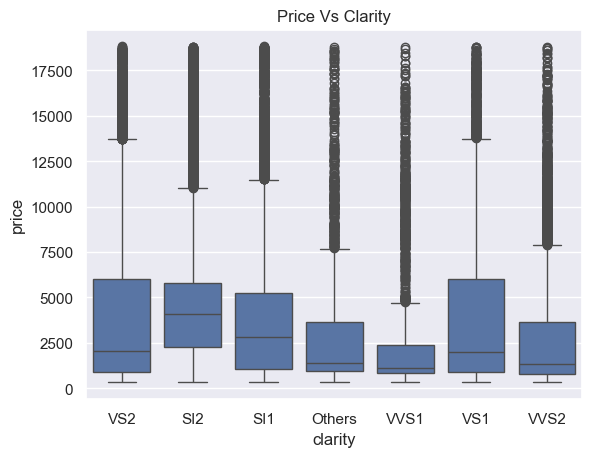

In [68]:
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Price Vs Clarity')
plt.show()


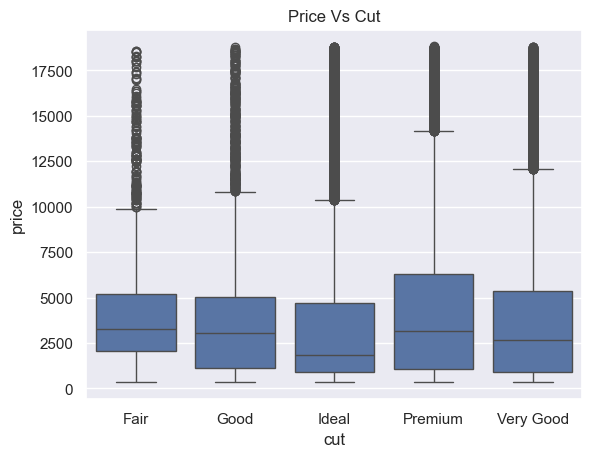

In [69]:
sns.boxplot(x='cut', y='price', data=df)
plt.title('Price Vs Cut')
plt.show()

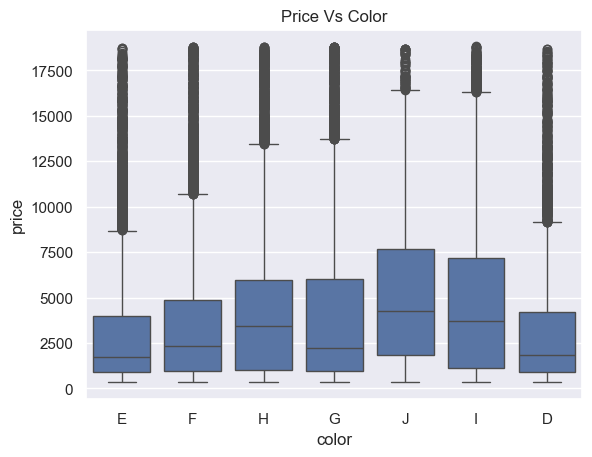

In [70]:
sns.boxplot(x='color', y='price', data=df)
plt.title('Price Vs Color')
plt.show()

# EDA ON NUMBERICAL FEATURES

### Visualizing the relationship between numerical features and target.

## Carat vs Price

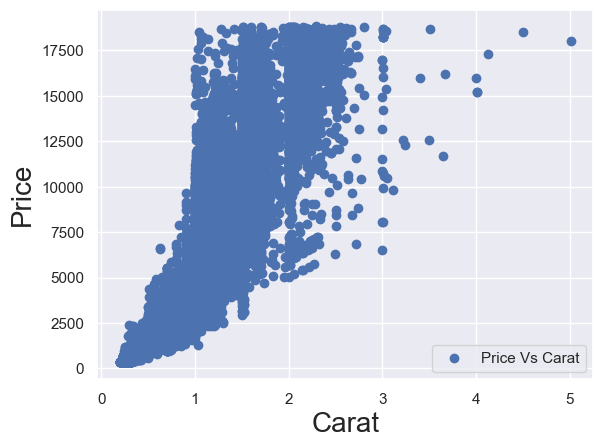

In [71]:
plt.scatter(data =df, x ='carat',y= 'price', label = 'Price Vs Carat' )
plt.xlabel('Carat', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

### from the above EDA, it is evident that carat vs price  form a pattern (like an upward trend), it means there is  a correlation. Hence, i can choose to fit with a regression line. This makes sense because the higher the carat of a diamond , there would be increase in price

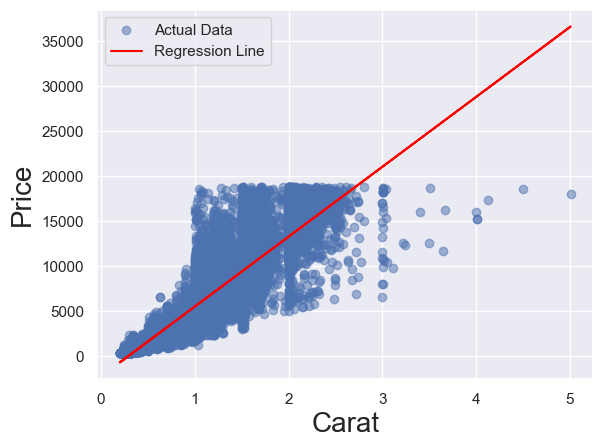

In [72]:
m, b = np.polyfit(df['carat'], df['price'], 1)  
plt.scatter(df['carat'], df['price'], label='Actual Data', alpha=0.5)
plt.plot(df['carat'], m * df['carat'] + b, color='red', label='Regression Line')
plt.xlabel('Carat', fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.legend()
plt.show()


## Depth vs Price

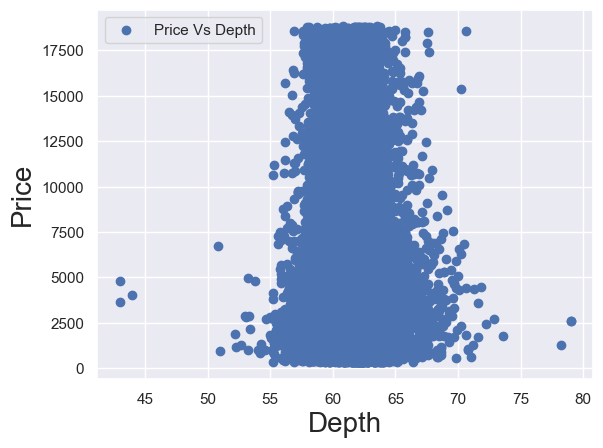

In [73]:
plt.scatter(data =df, x ='depth',y= 'price', label = 'Price Vs Depth' )
plt.xlabel('Depth', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

## Table vs Price

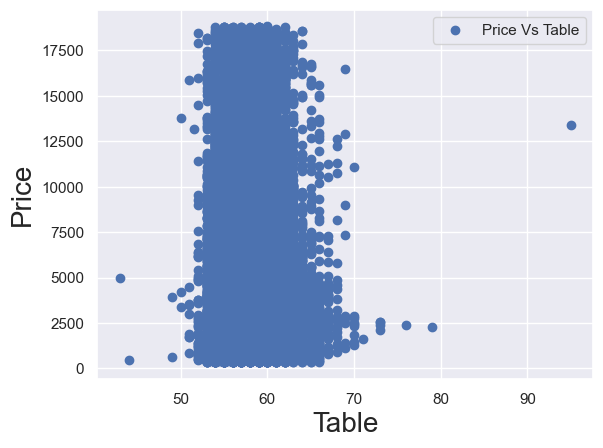

In [74]:
plt.scatter(data =df, x ='table',y= 'price', label = 'Price Vs Table' )
plt.xlabel('Table', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

### From the EDA on depth and table to price, there seems to be no clear relationship/pattern. However i will explore this more better with my correlation matrix 

## X_(Premium) i.e Width VS Price

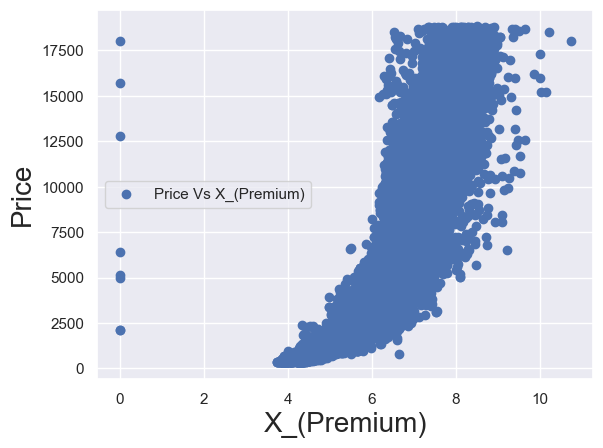

In [75]:
plt.scatter(data =df, x ='x_(premium)',y= 'price', label = 'Price Vs X_(Premium)' )
plt.xlabel('X_(Premium)', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

###  it is evident that width of a diamond vs price  form a pattern (like an upward trend). There's a relationship

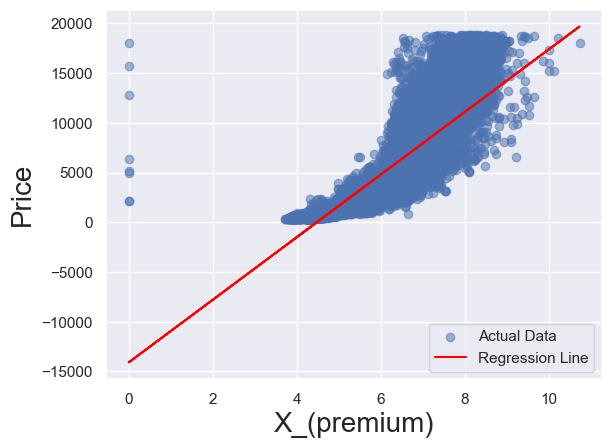

In [76]:
m, b = np.polyfit(df['x_(premium)'], df['price'], 1)  
plt.scatter(df['x_(premium)'], df['price'], label='Actual Data', alpha=0.5)
plt.plot(df['x_(premium)'], m * df['x_(premium)'] + b, color='red', label='Regression Line')
plt.xlabel('X_(premium)', fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.legend()
plt.show()

## Z_(Very Good) i.e Height VS Price

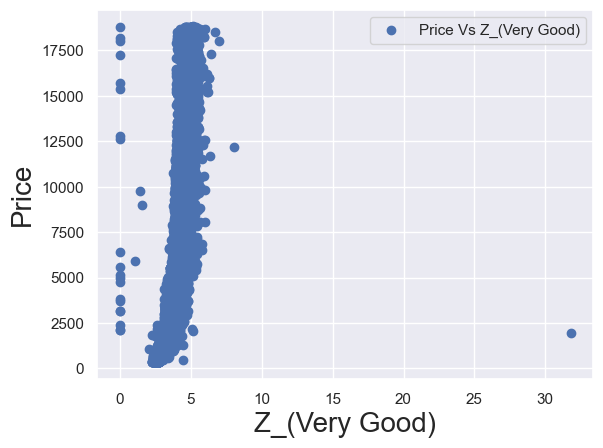

In [77]:
plt.scatter(data =df, x ='z_(very_good)',y= 'price', label = 'Price Vs Z_(Very Good)' )
plt.xlabel('Z_(Very Good)', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

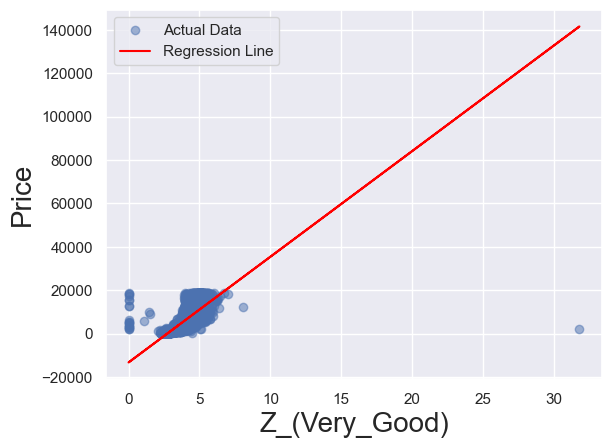

In [78]:
m, b = np.polyfit(df['z_(very_good)'], df['price'], 1)  
plt.scatter(df['z_(very_good)'], df['price'], label='Actual Data', alpha=0.5)
plt.plot(df['z_(very_good)'], m * df['z_(very_good)'] + b, color='red', label='Regression Line')
plt.xlabel('Z_(Very_Good)', fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.legend()
plt.show()

## Y_(Good) i.e Length VS Price

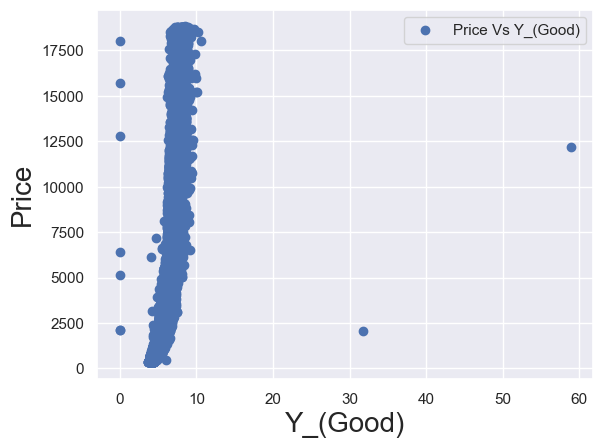

In [79]:
plt.scatter(data =df, x ='y_(good)',y= 'price', label = 'Price Vs Y_(Good)' )
plt.xlabel('Y_(Good)', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

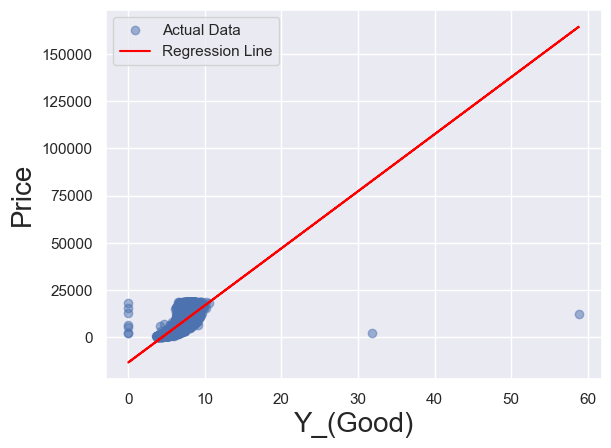

In [80]:
m, b = np.polyfit(df['y_(good)'], df['price'], 1)  
plt.scatter(df['y_(good)'], df['price'], label='Actual Data', alpha=0.5)
plt.plot(df['y_(good)'], m * df['y_(good)'] + b, color='red', label='Regression Line')
plt.xlabel('Y_(Good)', fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.legend()
plt.show()

## INSIGHT:  From my Exploratory Data Analysis (EDA) on the numerical features, I observed that Price, Carat, Length, Height, and Width exhibit a strong relationship, indicating a possible linear correlation. However, Depth and Table show little to no relationship with Price.

## To explore this further, I will analyze a correlation matrix to quantify the strength and direction of these relationships. This will help confirm which features have the most significant impact on Price and guide feature selection for modeling.

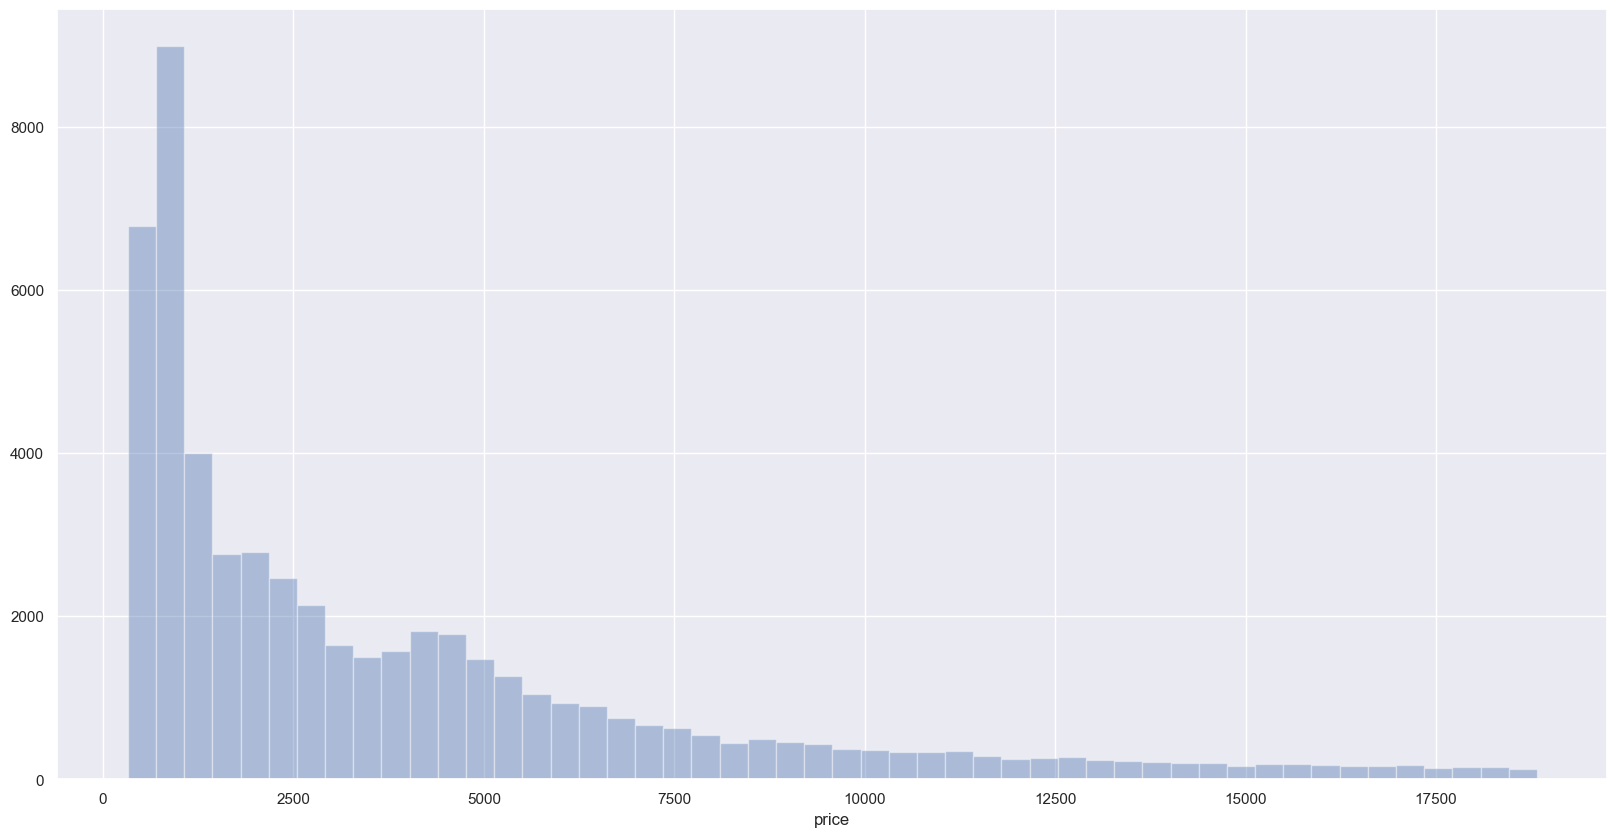

In [81]:
# Visualization on the target variable to check if it has a long tail or not

plt.figure(figsize = (20,10))
sns.distplot(df['price'],kde = False);

#### From the EDA above, the target variable exhibits a long tail distribution, suggesting the presence of potential outliers. I will further investigate this to assess their impact on the analysis

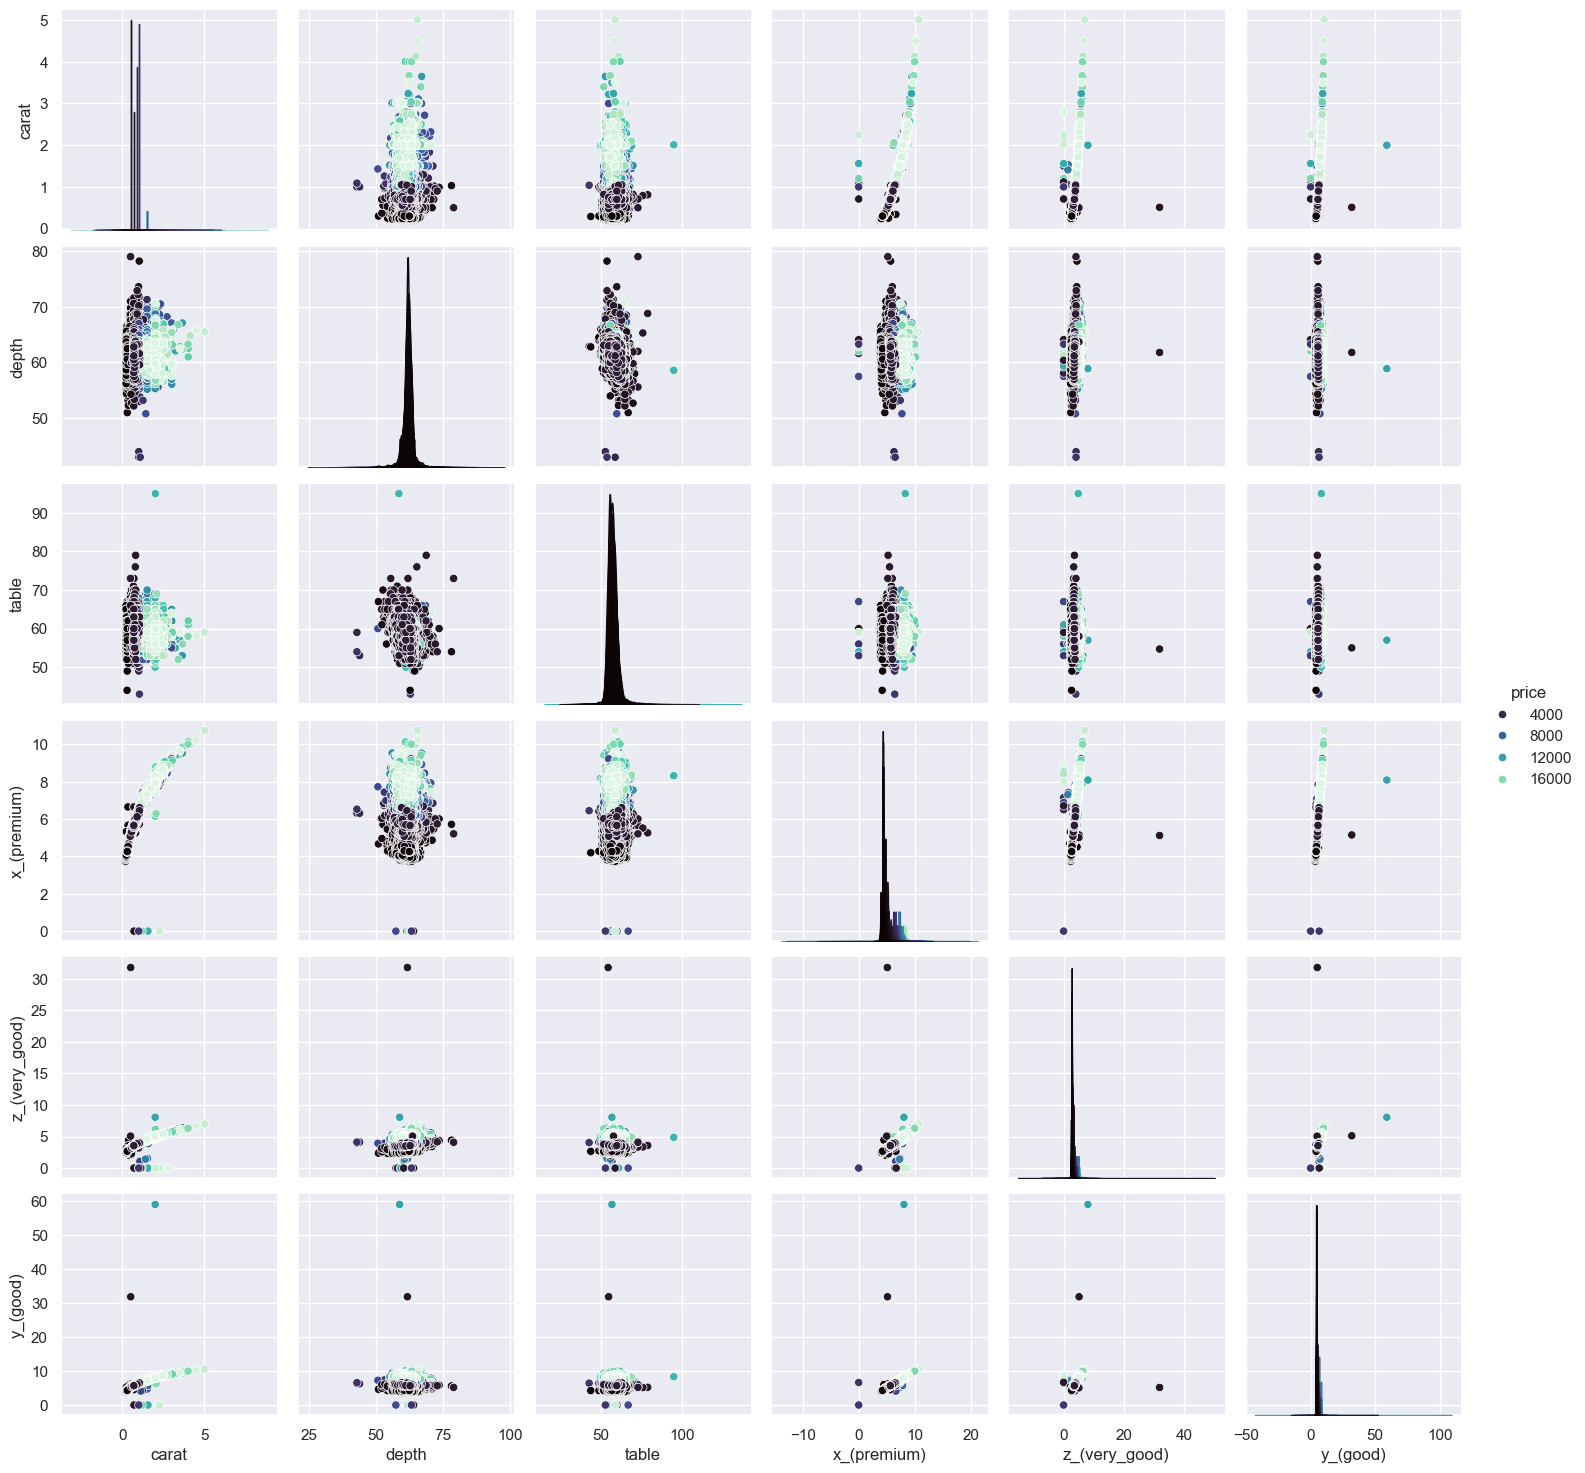

In [26]:
sns.pairplot(df[['carat', 'depth','table','x_(premium)','z_(very_good)','y_(good)', 'price']], palette='mako',hue='price');

### From the EDA above, I observed a strong correlation between certain features, which might indicate potential multicollinearity. To confirm this concern, I will further explore the data to assess its impact and determine the best approach for feature selection.

## Further Exploration

In [36]:
df.head()

,price,cut,color,clarity,carat,depth,table,x_(premium),z_(very_good),y_(good)
0,337,Fair,E,VS2,0.22,65.1,61.0,3.87,2.49,3.78
1,2757,Fair,E,SI2,0.86,55.1,69.0,6.45,3.52,6.33
2,2759,Fair,F,SI2,0.96,66.3,62.0,6.27,4.07,5.95
3,2762,Fair,F,VS2,0.70,64.5,57.0,5.57,3.58,5.53
4,2762,Fair,F,VS2,0.70,65.3,55.0,5.63,3.66,5.58


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          53940 non-null  int64  
 1   cut            53940 non-null  object 
 2   color          53940 non-null  object 
 3   clarity        53940 non-null  object 
 4   carat          53940 non-null  float64
 5   depth          53940 non-null  float64
 6   table          53940 non-null  float64
 7   x_(premium)    53940 non-null  float64
 8   z_(very_good)  53940 non-null  float64
 9   y_(good)       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [83]:
df.isna().sum()

price            0
cut              0
color            0
clarity          0
carat            0
depth            0
table            0
x_(premium)      0
z_(very_good)    0
y_(good)         0
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(146)

In [85]:
#### we have duplicated rows of 146. 

In [86]:
df.drop_duplicates(inplace=True)

In [87]:

df.reset_index(drop=True, inplace=True)

In [88]:
len(df)

53794

In [89]:
## Statistical Description of all numerical features

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
depth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
x_(premium),53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
z_(very_good),53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80
y_(good),53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90


In [90]:
df.head()

,price,cut,color,clarity,carat,depth,table,x_(premium),z_(very_good),y_(good)
0,337,Fair,E,VS2,0.22,65.1,61.0,3.87,2.49,3.78
1,2757,Fair,E,SI2,0.86,55.1,69.0,6.45,3.52,6.33
2,2759,Fair,F,SI2,0.96,66.3,62.0,6.27,4.07,5.95
3,2762,Fair,F,VS2,0.70,64.5,57.0,5.57,3.58,5.53
4,2762,Fair,F,VS2,0.70,65.3,55.0,5.63,3.66,5.58


### Since our dataset has an inherent ranking pattern, it makes sense to use either manual mapping with a dictionary or ordinal encoding, as this approach prevents data leakage.

In [91]:
## Using ordinal encoding technique, the best approach for dataset  with inherent ranking 

cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D'] 
clarity_order = ['Others', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1'] 

encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])

categorical_cols = ['cut', 'color', 'clarity']

df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

In [92]:
df.head()

,price,cut,color,clarity,carat,depth,table,x_(premium),z_(very_good),y_(good)
0,337,0.0,5.0,3.0,0.22,65.1,61.0,3.87,2.49,3.78
1,2757,0.0,5.0,1.0,0.86,55.1,69.0,6.45,3.52,6.33
2,2759,0.0,4.0,1.0,0.96,66.3,62.0,6.27,4.07,5.95
3,2762,0.0,4.0,3.0,0.70,64.5,57.0,5.57,3.58,5.53
4,2762,0.0,4.0,3.0,0.70,65.3,55.0,5.63,3.66,5.58


### Categories were mapped  correctly based on the rank. 

## Correlation matrix  between my features and targets

In [95]:
correlation = df.corr()
correlation

,price,cut,color,clarity,carat,depth,table,x_(premium),z_(very_good),y_(good)
price,1.000000,-0.052241,-0.171825,-0.114251,0.921548,-0.011048,0.126566,0.884504,0.861208,0.865395
cut,-0.052241,1.000000,0.020162,0.128120,-0.133376,-0.217078,-0.433700,-0.124303,-0.147940,-0.120233
color,-0.171825,0.020162,1.000000,-0.000314,-0.291019,-0.047572,-0.026102,-0.269876,-0.267825,-0.263153
clarity,-0.114251,0.128120,-0.000314,1.000000,-0.279117,-0.046079,-0.105461,-0.290240,-0.285494,-0.280095
carat,0.921548,-0.133376,-0.291019,-0.279117,1.000000,0.027861,0.181091,0.975380,0.953542,0.951908
depth,-0.011048,-0.217078,-0.047572,-0.046079,0.027861,1.000000,-0.297669,-0.025348,0.094757,-0.029389
table,0.126566,-0.433700,-0.026102,-0.105461,0.181091,-0.297669,1.000000,0.194855,0.150270,0.183231
x_(premium),0.884504,-0.124303,-0.269876,-0.290240,0.975380,-0.025348,0.194855,1.000000,0.970686,0.974592
z_(very_good),0.861208,-0.147940,-0.267825,-0.285494,0.953542,0.094757,0.150270,0.970686,1.000000,0.951844
y_(good),0.865395,-0.120233,-0.263153,-0.280095,0.951908,-0.029389,0.183231,0.974592,0.951844,1.000000


<Axes: >

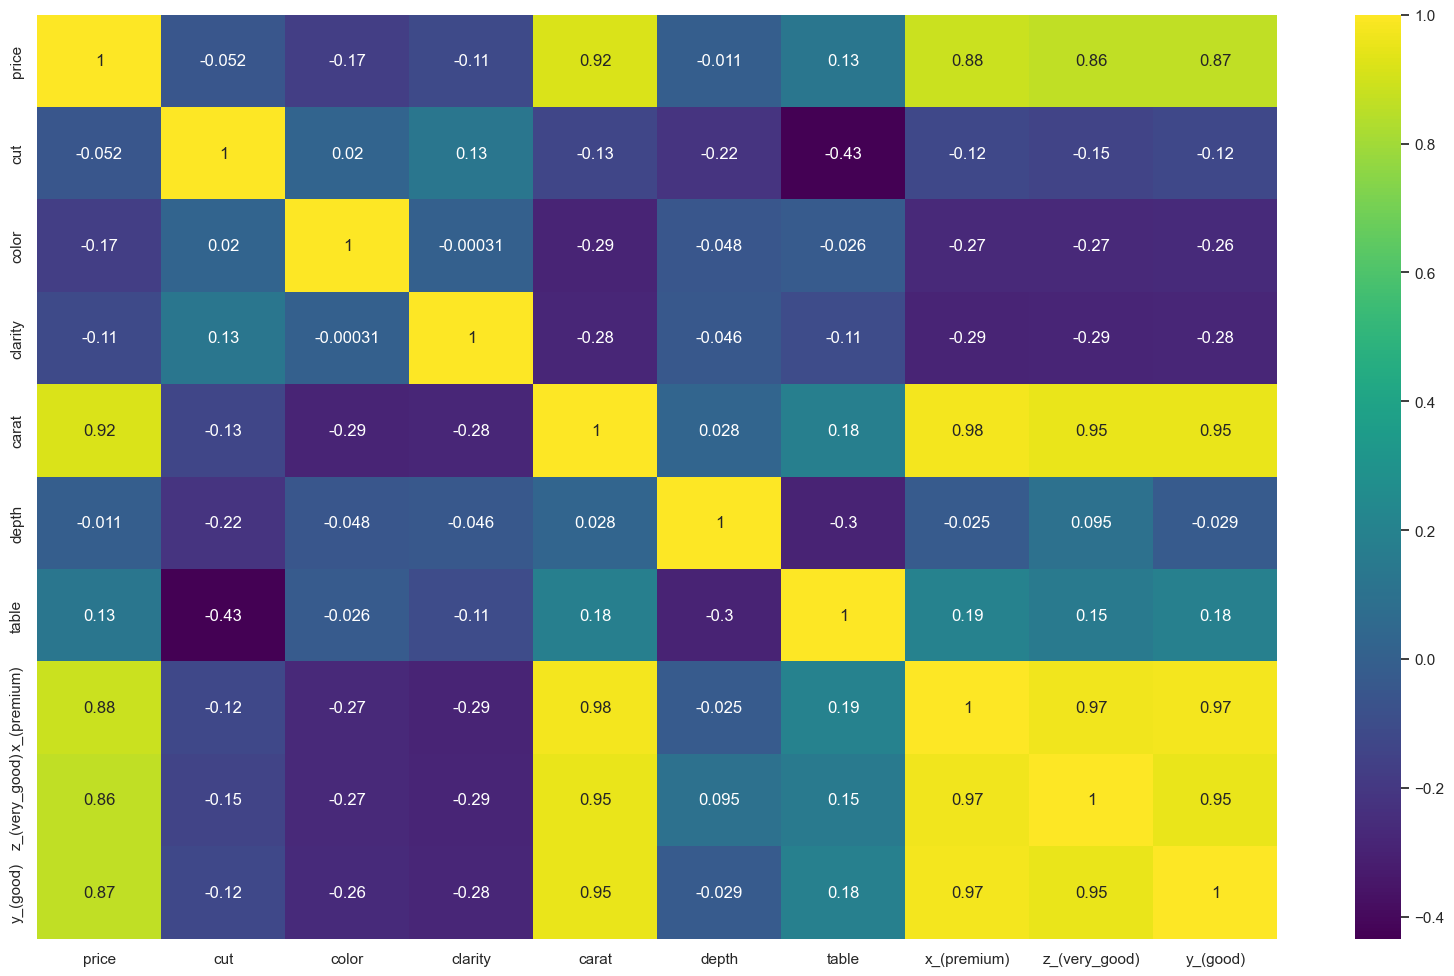

In [99]:
plt.figure(figsize=(20,12))

sns.heatmap(correlation,annot = True,cmap= 'viridis')

<Axes: >

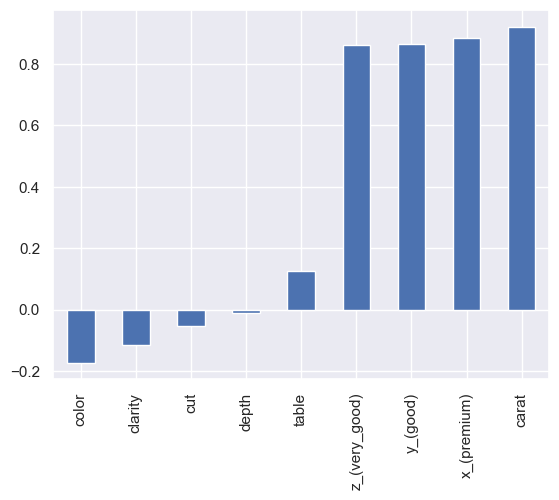

In [100]:
# Using bar plot to further visualize the correlation

df.corr()['price'].sort_values().drop('price').plot(kind ='bar')

### As expected, Length, Height, Width, and Carat exhibit strong correlations with price, while Depth, especially, along with Table, shows very low correlation. To ensure there is no multicollinearity among these features, I will further analyze them independently without the price.

In [108]:
features = df[['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'x_(premium)', 'z_(very_good)', 'y_(good)']]

In [109]:
features.corr()

,cut,color,clarity,carat,depth,table,x_(premium),z_(very_good),y_(good)
cut,1.000000,0.020162,0.128120,-0.133376,-0.217078,-0.433700,-0.124303,-0.147940,-0.120233
color,0.020162,1.000000,-0.000314,-0.291019,-0.047572,-0.026102,-0.269876,-0.267825,-0.263153
clarity,0.128120,-0.000314,1.000000,-0.279117,-0.046079,-0.105461,-0.290240,-0.285494,-0.280095
carat,-0.133376,-0.291019,-0.279117,1.000000,0.027861,0.181091,0.975380,0.953542,0.951908
depth,-0.217078,-0.047572,-0.046079,0.027861,1.000000,-0.297669,-0.025348,0.094757,-0.029389
table,-0.433700,-0.026102,-0.105461,0.181091,-0.297669,1.000000,0.194855,0.150270,0.183231
x_(premium),-0.124303,-0.269876,-0.290240,0.975380,-0.025348,0.194855,1.000000,0.970686,0.974592
z_(very_good),-0.147940,-0.267825,-0.285494,0.953542,0.094757,0.150270,0.970686,1.000000,0.951844
y_(good),-0.120233,-0.263153,-0.280095,0.951908,-0.029389,0.183231,0.974592,0.951844,1.000000


### As suspected earlier multicollinearity has been Detected: Carat, X (Premium), Z (Very Good), and Y (Good) have very high correlations (above 0.95), indicating multicollinearity. This suggests that these features contain redundant information and should be explored further for feature selection. I will do a feature engineering on these features later on

## Outliers Check

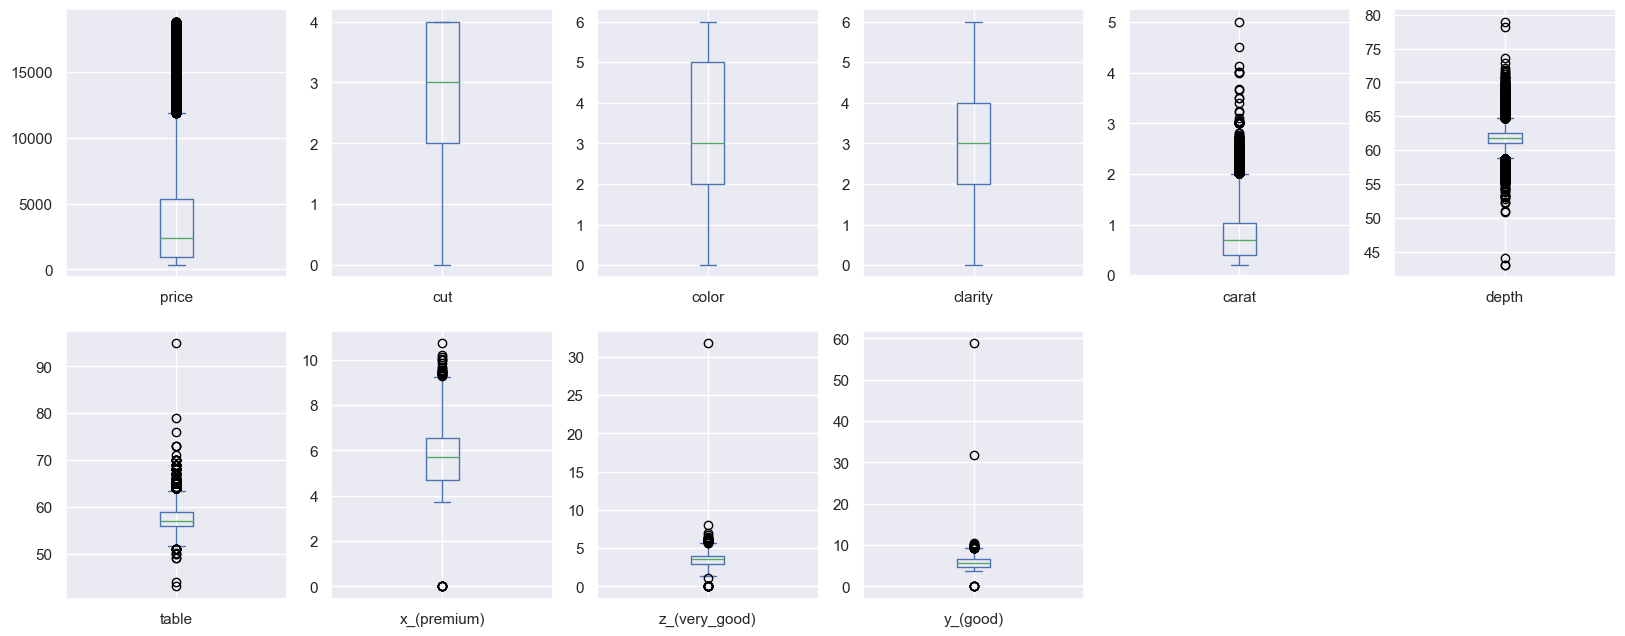

In [110]:
df.plot(
     kind = 'box',
    subplots = True,
    figsize =(20,16),
    layout = (4,6) 
);

In [114]:
# Calculate Q1 and Q3

Q1 =df.quantile(0.25)
Q3 =df.quantile(0.75)

IQR = Q3 - Q1

# Determine outlier bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
outliers = pd.DataFrame()

for column in df:
    outlier_mask = (df[column] < lower_bound[column]) | (df[column] > upper_bound[column])
    outliers = pd.concat([outliers, df[column][outlier_mask]], axis=1)

In [116]:
 outliers.count()

price            3523
cut                 0
color               0
clarity             0
carat            1873
depth            2525
table             604
x_(premium)        31
z_(very_good)      48
y_(good)           28
dtype: int64

In [117]:
len(outliers)

6378

### Visualizing the features with the outliers to analyze and invigate the nature of the outliers

<Axes: xlabel='price', ylabel='Density'>

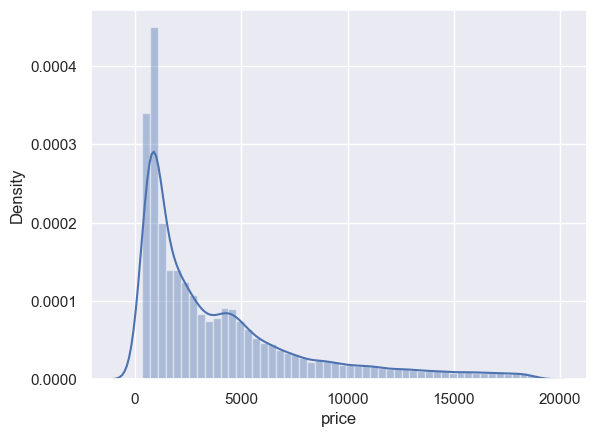

In [122]:
sns.distplot(df['price'])

<Axes: xlabel='carat', ylabel='Density'>

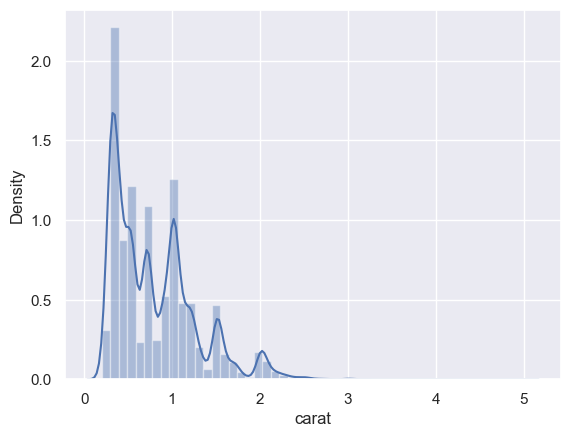

In [119]:
sns.distplot(df['carat'])

<Axes: xlabel='depth', ylabel='Density'>

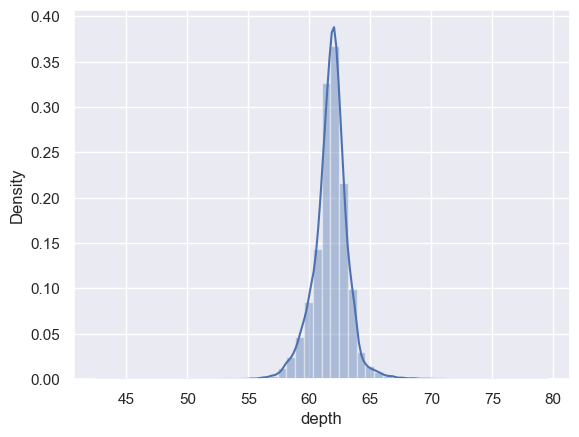

In [120]:
sns.distplot(df['depth'])

<Axes: xlabel='table', ylabel='Density'>

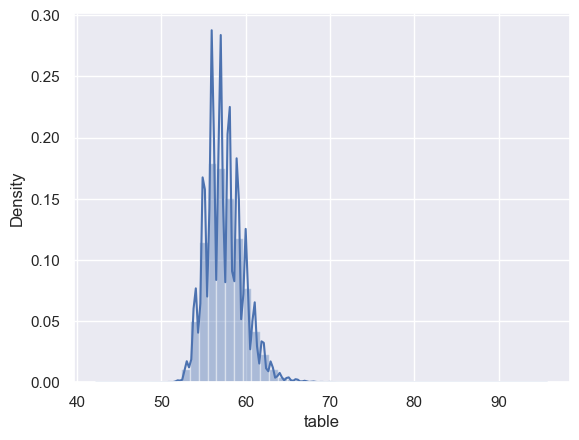

In [121]:
sns.distplot(df['table'])

<Axes: xlabel='x_(premium)', ylabel='Density'>

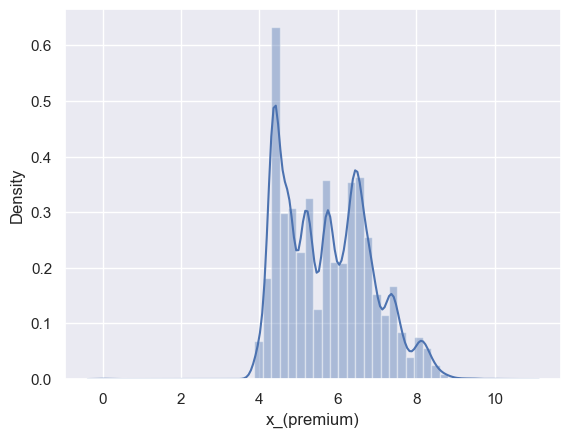

In [123]:
sns.distplot(df['x_(premium)'])

<Axes: xlabel='z_(very_good)', ylabel='Density'>

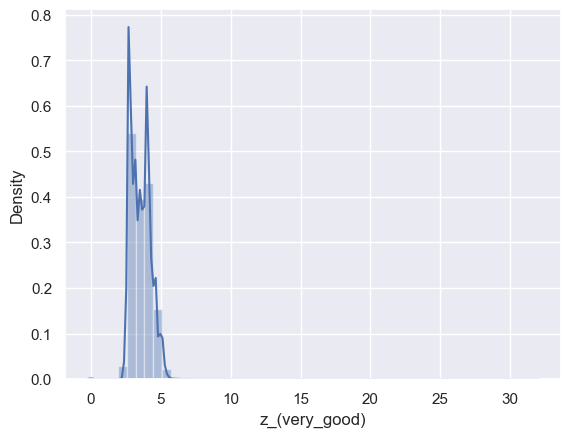

In [124]:
sns.distplot(df['z_(very_good)'])

<Axes: xlabel='y_(good)', ylabel='Density'>

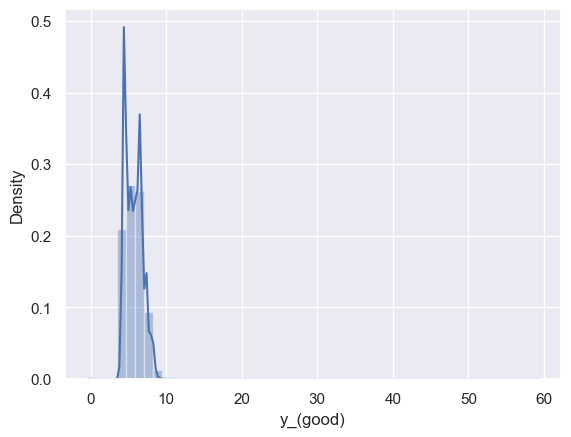

In [125]:
sns.distplot(df['y_(good)'])

### INSIGHTS:  There is no 100% definitive method for dealing with outliers; we can either drop, reduce, or work with them. Based on my observation, dropping the outliers is NOT an option here because they do not satisfy the 5% rule of thumb, as we have 6,378 outliers, which is over 10% of the total dataset. I also noticed that the price column might be problematic, as it contains a large number of extreme price values. However, I believe removing them might not be ideal because I want my model to be capable of detecting high prices in real-life scenarios. Therefore, my main focus will be on the price column. I will  run a comparison between the model's performance with and without the outliers. If the outliers do not significantly affect the model's performance, I will leave them in.

In [126]:
df.head()

,price,cut,color,clarity,carat,depth,table,x_(premium),z_(very_good),y_(good)
0,337,0.0,5.0,3.0,0.22,65.1,61.0,3.87,2.49,3.78
1,2757,0.0,5.0,1.0,0.86,55.1,69.0,6.45,3.52,6.33
2,2759,0.0,4.0,1.0,0.96,66.3,62.0,6.27,4.07,5.95
3,2762,0.0,4.0,3.0,0.70,64.5,57.0,5.57,3.58,5.53
4,2762,0.0,4.0,3.0,0.70,65.3,55.0,5.63,3.66,5.58


In [127]:
df.count()

price            53794
cut              53794
color            53794
clarity          53794
carat            53794
depth            53794
table            53794
x_(premium)      53794
z_(very_good)    53794
y_(good)         53794
dtype: int64

# PHASE 3